In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
import seaborn as sb

In [2]:
e_commerce = {}

brazil_ecommerce_path = 'G:\CNTT_VB2\Database\DA\Kaggle_practise\W1_Brazilian_E_commerce\Archive_2'
marketing_funnel = 'G:\CNTT_VB2\Database\DA\Kaggle_practise\W1_Brazilian_E_commerce\Marketing_funnel'

# Gather all file of brazil_ecommerce:
files = [f_ for f_ in os.listdir(brazil_ecommerce_path)]

for item in files:
    item_name = item.split('.')[0]
    item_path = brazil_ecommerce_path + '\{}'.format(item) 
    e_commerce[item_name] = pd.read_csv(item_path)

for key in e_commerce:
    print(key, end='\n')

olist_customers_dataset
olist_geolocation_dataset
olist_orders_dataset
olist_order_items_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset
olist_sellers_dataset
product_category_name_translation


In [3]:
list_key = e_commerce.keys()

#Check info for each dataset
for item in list_key:
    print(e_commerce[item].info(), end='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

### Về bộ dataset Brazilian E-commerce, ta có các bảng gồm các trường dữ liệu như sau:
    
#### 1. Dataset Customer:  
**- customer_id**: Mã định danh khách hàng dùng cho dataset Orders  
**- customer_unique_id**: Mã định danh duy nhất từng khách hàng  
**- customer_zip_code_prefix**: Mã vùng của KH  
**- customer_city**: Thành phố  
**- customer_stage**: Tiểu bang nơi KH sinh sống  

#### 2. Dataset Geography:  
**- geolocation_zip_code_prefix**: 5 ký tự số đầu tiên của mã vùng tương ứng  
**- geolocation_lat**: Tọa độ kinh độ  
**- geolocation_lng**: Tọa độ vĩ độ  
**- geolocation_city**: Tên thành phố  
**- geolocation_state**: Tên tiểu bang  

#### 3. Dataset Orders:  
**- order_id**: Mã đặt hàng tương ứng với KH, là duy nhất với mỗi KH  
**- customer_id**: Trường khóa tương ứng từ bảng Customer  
**- order_status**: Tình trạng đơn hàng (*đã nhận*, *dã giao*, *khác*)  
**- order_purchase_timestamp**: Thời gian KH đã mua (đặt) món hàng này  
**- order_approved_at**: Khoảng thời gian mà đơn hàng được tính là đã thanh toán  
**- order_delivered_carrier_date**: Thời gian khi đơn hàng này được giao cho bên đối tác hậu cần (đơn hàng bắt đầu được xử lý bởi bên hậu cần)  
**- order_delivered_customer_date**: Ngày giao hàng thực tế cho KH của đơn hàng này  
**- order_estimate_delivery_date**: Thời gian dự tính sẽ giao cho KH (*báo cho KH sẽ giao món hàng này vào ngày này*)  

#### 4. Order_items dataset:  
**- order_id**: Mã đơn hàng  
**- order_item_id**: Chỉ định đơn hàng này có bao nhiêu món hàng trong đó  
**- product_id**: Mã sản phẩm đã mua  
**- seller_id**: Mã đối tác bán hàng  
**- shipping_limit_date**: Hiển thị ngày giới hạn vận chuyển của người bán để xử lý đơn hàng cho đối tác hậu cần.  
**- price**: Giá thành/ sp của sản phẩm  
**- freight_value**: Chi phí vận chuyển cho đơn hàng này (*nếu một đơn hàng có nhiều hơn một mặt hàng, giá trị vận chuyển sẽ được chia cho các mặt hàng*)  

#### 5. Payment dataset:  
**- order_id**: Mã đơn hàng  
**- payment_sequential**: Số cách thức KH thanh toán cho 1 đơn hàng (*thông thường là 1*)  
**- payment_type**: KH thanh toán qua dịch vụ nào (*credit_card*, *boleto*, *etc..*)  
**- payment_installments**: Các đợt thanh toán cho đơn hàng này (*? Chấp nhận thanh toán theo đợt ?*)  
**- payment_value**: Số tiền KH thanh toán  

#### 6. Order_review Dataset:  
**- review_id**: Chuỗi định danh ứng với review từ KH  
**- order_id**: Mã đơn hàng  
**- review_score**: Điểm đánh giá (*từ 1 đến 5*)  
**- review_comment_title**: Tiêu đề của đánh giá  
**- review_comment_message**: Nội dung đánh giá  
**- review_creation_date**: Hiển thị ngày gửi bản khảo sát về mức độ hài lòng cho khách hàng.  
**- review_answer_timestamp**: Hiển thị ngày giờ (thời gian) trả lời bài khảo sát  

#### 7. Product Dataset:  
**- product_id**: Mã sản phẩm  
**- product_category_name**: Tên danh mục của sản phẩm  
**- product_name_length**: Độ dài tên sản phẩm  
**- product_description_length**: Độ dài của lời giới thiệu sản phẩm  
**- product_photo_qty**: Số lượng ảnh cho sản phẩm này  
**- product_weight_g**: Trọng lượng của sản phẩm (tính theo grams)  
**- product_length_cm**: chiều dài sản phẩm được đo bằng cm.  
**- product_height_cm**: chiều cao sản phẩm được đo bằng cm.  
**- product_width_cm**: chiều rộng sản phẩm được đo bằng cm.  

#### 8. Seller dataset  
**- seller_id**: Mã đối tác/ nhà bán hàng  
**- seller_zip_code_prefix**: 5 chữ số đầu tiên của mã zip người bán  
**- seller_city**: Tên thành phố  
**- seller_state**: Tên tiểu bang  

#### 9. Product_category dataset: Translates the product_category_name to english  
**- product_category_name**: tên danh mục bằng tiếng Bồ Đào Nha  
**- product_category_name_english**: tên danh mục bằng Anh  

##### Mục tiêu EDA bộ dữ liệu này:  
**1.** Có bộ dữ liệu sạch để trực quan hóa trên PowerBI  
**2.** Có cái nhìn sơ qua về hiệu suất giao hàng  
**3.** Product Quality: Ngành hàng nào - mục sp nào nhận nhiều review ko tích cực nhất?  

In [4]:
# Kiem tra null => in ra column: %null 
def checkNull(dframe):
    orinLength = dframe.shape[0]
    colList = dframe.columns
    for item in colList:
        lenth = dframe[item][dframe[item].isnull()].shape[0]
        if (lenth > 0):
            nullRatio = lenth/orinLength * 100
            print(f'{item}: {nullRatio :.2f}% null value', end='\n')

for item in list_key:
    checkNull(e_commerce[item])      

order_approved_at: 0.16% null value
order_delivered_carrier_date: 1.79% null value
order_delivered_customer_date: 2.98% null value
review_comment_title: 88.34% null value
review_comment_message: 58.70% null value
product_category_name: 1.85% null value
product_name_lenght: 1.85% null value
product_description_lenght: 1.85% null value
product_photos_qty: 1.85% null value
product_weight_g: 0.01% null value
product_length_cm: 0.01% null value
product_height_cm: 0.01% null value
product_width_cm: 0.01% null value


##### Các bảng sau đây bị null:  
1. Bảng Orders  
2. Bảng Order_review  
3. Bảng Product  
4. Bảng Category_name (bảng chuyển đổi tên)  

Xét bảng Orders, ta thấy tỷ lệ cao nhất là 2.98% null, và có 3 trường ngày tháng đều có records null => ưu tiên xóa các records tại đó cả 3 cùng bị missing  

In [5]:
# Dat dieu kien loai cac records null
carrier_null = e_commerce['olist_orders_dataset']['order_delivered_carrier_date'].isnull()
customer_date_null = e_commerce['olist_orders_dataset']['order_delivered_customer_date'].isnull()
approved_null = e_commerce['olist_orders_dataset']['order_approved_at'].isnull()

combine_cond = ~(carrier_null & customer_date_null & approved_null)

checkDF = e_commerce['olist_orders_dataset'][combine_cond]
checkNull(checkDF)

order_approved_at: 0.01% null value
order_delivered_carrier_date: 1.65% null value
order_delivered_customer_date: 2.84% null value


In [6]:
#Kiem tra records tai field approved_at la null
checkDF[checkDF['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Ta thấy có sự mâu thuẫn ở kết quả trên:  
- Ngày đặt hàng, ngày giao bên giao vận và ngày dự tính giao khách, ngày giao thực tế có => Đơn hàng này đã được chấp thuận  
- Ngày đơn hàng được chấp thuận đã thanh toán không có => *DO hệ thống lỗi hay do đây là sản phẩm miễn phí?*  
Ta kiểm tra khoản tiền KH đã trả và nếu được, các sản phẩm có trong đó để xét xem đây là sản phẩm miễn phí hay do hệ thống lỗi  
Nếu xác định được là do hệ thống lỗi nhưng đơn hàng đã hoàn tất => Vẫn giữ lại các records trên  
Nếu các sản phẩm trên là miễn phí => Có thể bỏ đi do ko ảnh hưởng đến kết quả sale cuối cùng

In [7]:
# Check số tiền KH đã trả cho đơn hàng:
payment_df = e_commerce['olist_order_payments_dataset']
orders_df = e_commerce['olist_orders_dataset']

payment_refer = pd.merge(orders_df, payment_df, how='left', on='order_id')

refer_order = checkDF[checkDF['order_approved_at'].isnull()]
list_refer_order = refer_order['order_id'].to_list()

cond = payment_refer['order_id'].isin(list_refer_order) == True
payment_refer[cond][['order_id', 'customer_id', 'order_approved_at', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'payment_type', 'payment_value']]

,order_id,customer_id,order_approved_at,order_delivered_customer_date,order_delivered_carrier_date,payment_type,payment_value
5533,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,NaN,2017-03-01 13:25:33,2017-02-23 12:04:47,boleto,349.01
17257,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,NaN,2017-03-02 10:05:06,2017-02-23 09:01:52,boleto,396.86
19855,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,NaN,2017-03-01 08:07:38,2017-02-22 16:25:25,boleto,65.52
23662,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,NaN,2017-03-09 07:28:47,2017-02-22 11:23:10,boleto,106.81
24184,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,NaN,2017-03-02 11:09:19,2017-02-22 11:23:11,boleto,95.76
28029,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,NaN,2017-01-30 18:16:01,2017-01-25 14:56:50,boleto,54.51
40088,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,NaN,2017-03-02 03:41:58,2017-02-23 03:11:48,boleto,163.43
41183,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,NaN,2017-03-02 16:15:23,2017-02-23 07:23:36,boleto,39.95
50647,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,NaN,2017-02-06 14:22:19,2017-01-27 11:08:05,boleto,60.42
64493,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,NaN,2017-03-03 12:16:03,2017-02-22 11:42:51,boleto,154.23


Ta thấy rằng các đơn hàng này đã được ghi nhận thanh toán (có giá trị ghi lại trong bảng Payment)  
=> Các bản ghi trên vẫn sẽ giữ lại, phục vụ cho việc phân tích về sau

In [8]:
#Tiep tuc check cac ban ghi ma ngay giao hang cho KH bi trong

checkDF[checkDF['order_delivered_customer_date'].isnull()].head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaN,2018-03-23 00:00:00


<Axes: xlabel='order_status'>

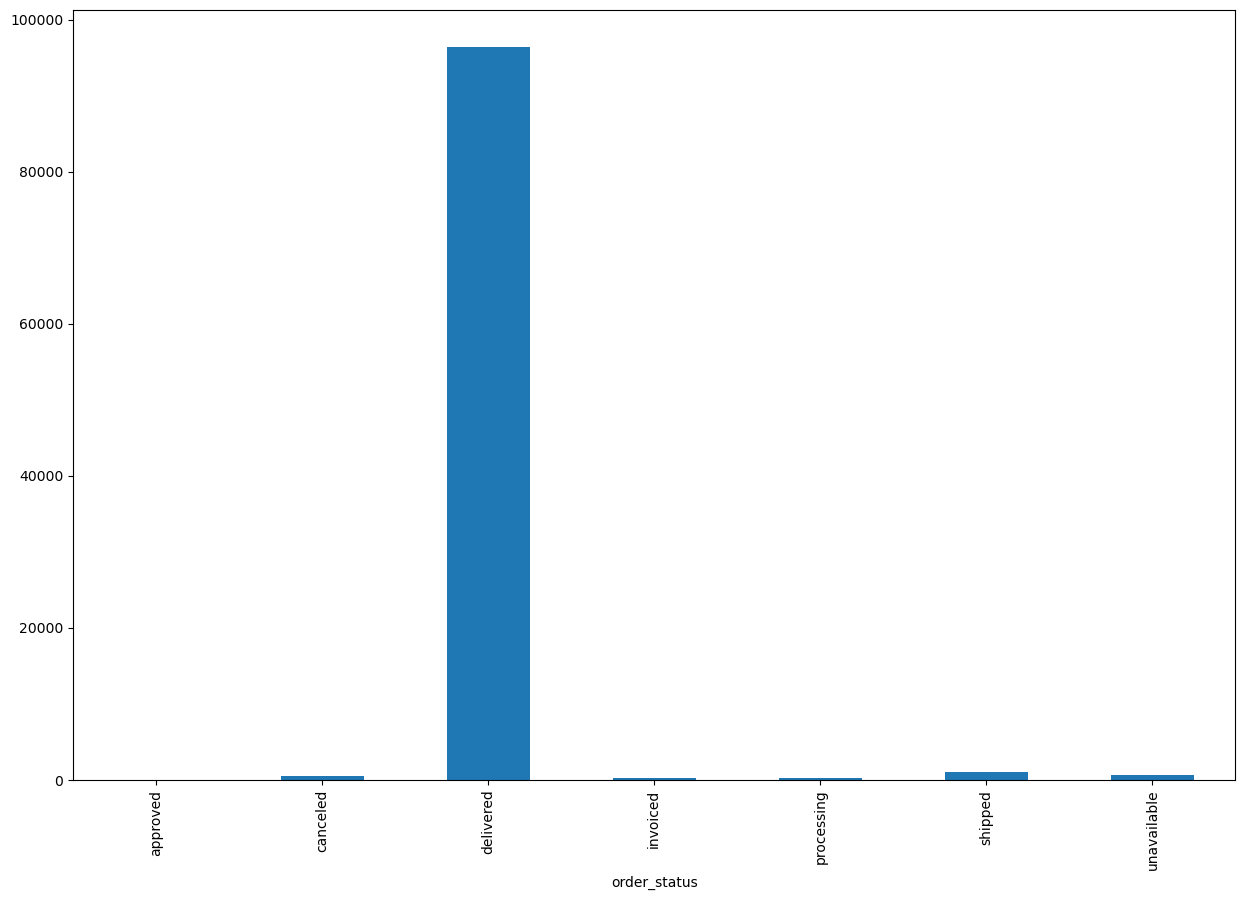

In [9]:
from matplotlib import pyplot as plt

#Phan bo tinh trang cac don hang nhu the nao
f, ax = plt.subplots(figsize=(15, 10))
checkDF.groupby('order_status').size().plot.bar(ax=ax)

#Tach rieng cac order bi canceled, unavaiable de xet rieng sau nay  
unavailable_order = checkDF[checkDF['order_status'].isin(['canceled', 'unavailable'])]

filename_1 = os.getcwd() + '\CanceledOrders.csv'  
unavailable_order.to_csv(filename_1)

In [10]:
#Bo di cac record status la cancel & unavailable => tiep tuc check:
checkDF2 = checkDF[~checkDF['order_status'].isin(['canceled','unavailable'])]
checkNull(checkDF2)

order_approved_at: 0.01% null value
order_delivered_carrier_date: 0.63% null value
order_delivered_customer_date: 1.76% null value


In [11]:
checkDF2['order_status'].value_counts()

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
approved          2
Name: count, dtype: int64

In [12]:
checkDF_n = checkDF2[checkDF2['order_delivered_customer_date'].isnull()]
checkNull(checkDF_n)

order_delivered_carrier_date: 35.68% null value
order_delivered_customer_date: 100.00% null value


In [13]:
checkDF_n['order_status'].value_counts()

order_status
shipped       1107
invoiced       314
processing     301
delivered        8
approved         2
Name: count, dtype: int64

In [14]:
cond = checkDF_n['order_status'].isin(['delivered', 'approved'])

checkDF_n[cond]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,NaN,2017-05-22 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [15]:
list_check_order = checkDF_n[cond]['order_id'].to_list()

cond_2 = payment_refer['order_id'].isin(list_check_order) == True
payment_refer[cond_2][['order_id', 'customer_id', 'order_approved_at', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'payment_type', 'payment_value']]

,order_id,customer_id,order_approved_at,order_delivered_customer_date,order_delivered_carrier_date,payment_type,payment_value
3154,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,2017-11-28 17:56:40,NaN,2017-11-30 18:12:23,credit_card,134.83
21521,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,2018-06-20 07:19:05,NaN,2018-06-25 08:05:00,debit_card,354.24
45872,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,2018-07-01 17:15:12,NaN,2018-07-03 13:57:00,credit_card,158.07
46974,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,2017-02-06 20:30:19,NaN,NaN,credit_card,61.62
82794,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,2018-07-01 22:15:14,NaN,2018-07-03 13:57:00,credit_card,158.07
86546,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,2018-07-01 21:29:54,NaN,2018-07-03 09:28:00,credit_card,204.62
92382,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,2017-04-30 20:32:41,NaN,NaN,credit_card,179.46
96770,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,2017-05-25 23:30:16,NaN,NaN,credit_card,194.00
101998,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,2018-06-08 12:36:39,NaN,2018-06-12 14:10:00,credit_card,120.12
102402,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,2018-06-27 16:29:30,NaN,2018-07-03 19:26:00,credit_card,54.97


##### Kết quả kiểm tra các records null trong dataset Order cho thấy:  
- Có 8 bản ghi cho kết quả KH đã trả tiền đơn hàng, và tình trạng đơn hàng là **delivered** tuy nhiên ngày thực nhận của khách hàng lại không có  
=> Tách riêng các bản ghi này để phân tích thêm vì sao KH đã nhận hàng nhưng lại không có ngày thực nhận  
- Có 2 bản ghi tình trạng **approved** tuy nhiên không có ngày gửi bên hậu cần hay ngày thực nhận của KH => có thể đây là lúc hệ thống đang thử nghiệm hoạt động  
=> Kiểm tra tiếp toàn bản ghi còn lại với tình trạng là **approved** -> xác nhận có đúng là bản ghi biểu thị cho việc đang thử nghiệm hệ thống không -> sẽ xóa nếu đúng  
- Các bản ghi còn lại với tình trạng không phải là **delivered** có thể tạm thời bỏ qua việc không có ngày thực nhận của KH

out_csv_1 = payment_refer[cond_2][['order_id', 'customer_id','order_status' ,'order_approved_at', 
'order_delivered_customer_date', 'order_delivered_carrier_date', 'payment_type', 'payment_value']]  

filename = os.getcwd() + '\CheckSys.csv'  
out_csv_1.to_csv(filename)  

In [16]:
checkDF2 = checkDF2[checkDF2['order_status'] != 'approved']
checkNull(checkDF2)

order_approved_at: 0.01% null value
order_delivered_carrier_date: 0.63% null value
order_delivered_customer_date: 1.76% null value


In [17]:
# check not cac record co ngay giao hau can la null:
checkDF2[checkDF2['order_delivered_carrier_date'].isnull()].head(15)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaN,NaN,2017-08-28 00:00:00
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaN,NaN,2017-12-20 00:00:00
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaN,NaN,2017-12-12 00:00:00
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaN,NaN,2017-04-04 00:00:00
1582,d815bd2c2bdd79e4c0e0263caa986d66,04d7d73089b39d83f81b829cbd98e43d,processing,2017-03-15 10:30:17,2017-03-15 10:30:17,NaN,NaN,2017-04-13 00:00:00
1604,52b828f13e08788433adad4a7d135779,3c9a7cf7435eb8c2afd717c62809b521,processing,2018-05-05 22:32:38,2018-05-05 22:53:19,NaN,NaN,2018-06-01 00:00:00


##### Với kết quả xác nhận data như trên, ta đưa ra 1 process xử lý missing value tại 3 trường trong bảng Orders như sau:  
1. Bỏ đi các bản ghi có 3 ngày giao nhận đều trống (có nghĩa là khách hàng chưa trả tiền cho hóa đơn đó)  
2. Bỏ đi các bản ghi có tình trạng đơn hàng là *canceled* và *unavailable*  
3. Do đã tách riêng các bản ghi nghi ngờ hệ thống có vấn đề => các bản ghi còn lại sẽ để nguyên

In [18]:
#Thuc hien thay doi tren dataset chinh:
e_commerce['olist_orders_dataset'] = e_commerce['olist_orders_dataset'][combine_cond]
e_commerce['olist_orders_dataset'] = e_commerce['olist_orders_dataset'][~e_commerce['olist_orders_dataset']['order_status'].isin(['canceled','unavailable'])]
e_commerce['olist_orders_dataset'] = e_commerce['olist_orders_dataset'][e_commerce['olist_orders_dataset']['order_status'] != 'approved']

checkNull(e_commerce['olist_orders_dataset'])

order_approved_at: 0.01% null value
order_delivered_carrier_date: 0.63% null value
order_delivered_customer_date: 1.76% null value


In [19]:
list_to_delete = checkDF_n[cond].index.to_list()
list_to_delete.remove(44897)
list_to_delete.remove(88457)

In [20]:
# Xoa cac ban ghi nghi he thong loi
e_commerce['olist_orders_dataset'] = e_commerce['olist_orders_dataset'].drop(index=list_to_delete, axis = 0)
checkNull(e_commerce['olist_orders_dataset'])

order_approved_at: 0.01% null value
order_delivered_carrier_date: 0.63% null value
order_delivered_customer_date: 1.75% null value


In [21]:
#Tiep tuc kiem tra duplicate bang
for item in list_key:
    dup_len = e_commerce[item][e_commerce[item].duplicated()].shape[0]
    if (dup_len > 0):
        print(f'{item} dataframe has {dup_len} duplicated records', end='\n')

olist_geolocation_dataset dataframe has 261831 duplicated records


In [22]:
#Loai bo duplicate bang:
e_commerce['olist_geolocation_dataset'] = e_commerce['olist_geolocation_dataset'].drop_duplicates()
e_commerce['olist_geolocation_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


#### Tiếp tục kiểm tra null tại 2 bảng: Product và Category_name, riêng bảng Review sẽ để lại để phục vụ phân tích sau  
- Tại các trường có thể suy ra kết quả => Thay thế trực tiếp  
- Các trường không có căn cứ để xóa hay thay => Giữ nguyên

In [23]:
#Check null bảng Product:
productNullCheck = e_commerce['olist_products_dataset'][e_commerce['olist_products_dataset']['product_description_lenght'].isnull()]
productNullCheck.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,e10758160da97891c2fdcbc35f0f031d,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,39e3b9b12cd0bf8ee681bbc1c130feb5,NaN,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,794de06c32a626a5692ff50e4985d36f,NaN,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,7af3e2da474486a3519b0cba9dea8ad9,NaN,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,629beb8e7317703dcc5f35b5463fd20e,NaN,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


##### Ta xet có bỏ các bản ghi null hay không bằng cách:  
- Đếm xem trong 1 đơn hàng đặt bao nhiêu loại hàng là loại không tên này  
- Tính tổng số tiền mà những sản phẩm này mang về  

Căn cứ trên số lượt mua sản phẩm và doanh thu mang về sẽ quyết định có bỏ đi hay không

In [24]:
#Aggregate theo san pham va order:
countOrder = pd.merge(productNullCheck,
                      e_commerce['olist_order_items_dataset'], how='inner', on='product_id')

checkOrder = countOrder.groupby('order_id').agg({'order_item_id':'size','product_id': 'size', 'price' : 'sum', 'freight_value' : 'sum'})
checkOrder[checkOrder['product_id'] > 1]

,order_item_id,product_id,price,freight_value
order_id,,,,
0342b8bec301294021371c16411b6c40,2,2,47.60,15.56
098a17af931400d21917fe24f3346b53,2,2,138.00,30.00
0ca8999f0176e37f35b6e49a9b2569da,3,3,30.94,22.13
0d10abc3bc3707c914cf5197ed2eb31e,3,3,70.50,47.37
0e0170b61d0a01970751c69f238a4dc2,3,3,95.10,22.44
...,...,...,...,...
f1cd9d30a289847f9a18900d191a4f05,2,2,169.80,27.22
f80060bf53cc4e98a9eb5d2dba263381,2,2,25.78,30.20
fa15822d98611a4ab8e33249b788ca7d,2,2,99.80,41.68


In [25]:
checkOrder.agg(['max', 'min', 'mean', 'median'])

,order_item_id,product_id,price,freight_value
max,6.000000,6.000000,3980.000000,346.400000
min,1.000000,1.000000,3.000000,0.000000
mean,1.104755,1.104755,123.732102,19.414066
median,1.000000,1.000000,89.900000,15.610000


In [26]:
#Thuc hien tinh tong doanh thu bao gom cac sp nay, so sanh co cau doanh thu:
countOrder.loc[:, 'ProductPrice'] = countOrder['order_item_id']*countOrder['price'] + countOrder['order_item_id']*countOrder['freight_value']
noname_price = countOrder['ProductPrice'].agg(['sum']).to_numpy()[0]

totalOrder = pd.merge(e_commerce['olist_order_items_dataset'],
                      e_commerce['olist_products_dataset'], how='left', on='product_id')
totalOrder.loc[:, 'ProductPrice'] = totalOrder['order_item_id']*totalOrder['price'] + totalOrder['order_item_id']*totalOrder['freight_value']
totalPrice = totalOrder['ProductPrice'].agg(['sum']).to_numpy()[0]

print(f'% distribution revenue of noname product to all product is {noname_price/totalPrice*100: .2f}%')

% distribution revenue of noname product to all product is  1.27%


<Axes: >

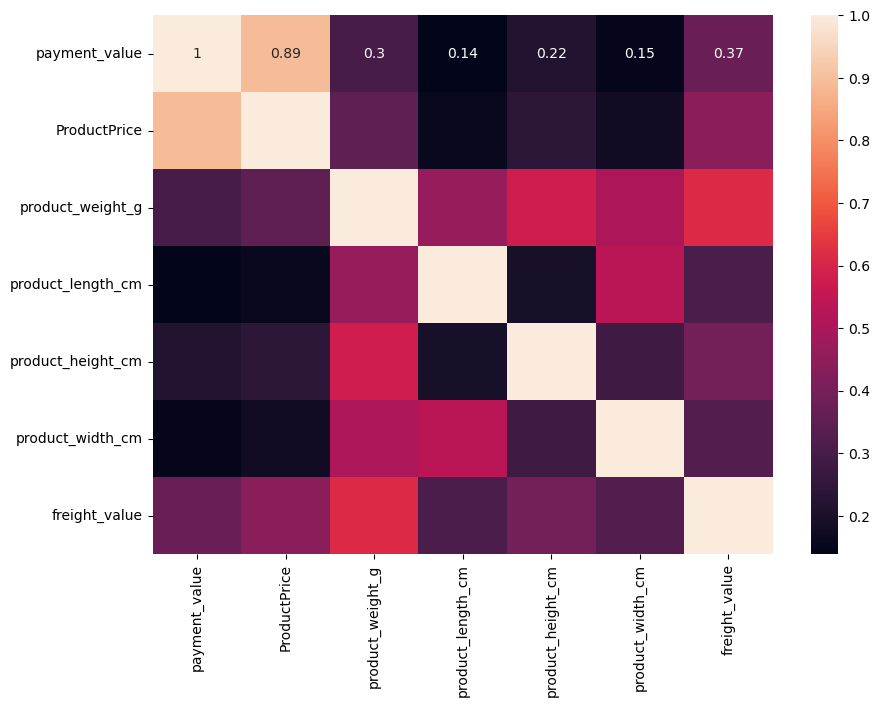

In [27]:
#Danh gia tuong quan giua loi nhuan thu ve va dac tinh san pham
numeric_col = ['payment_value','ProductPrice', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'freight_value']
corr_check = totalOrder.merge(e_commerce['olist_order_payments_dataset'], how='inner', on='order_id')

f, ax = plt.subplots(figsize = (10, 7))
corr = corr_check[numeric_col].corr()

sb.heatmap(corr, annot=True, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

##### Thông qua quá trình kiểm tra các bản ghi bị null trong bảng Product ta thấy:  
- Doanh thu/ (giá đơn hàng) có liên quan mật thiết với chi phí vận chuyển và kích thước hàng hóa => **Loại tất cả các bản ghi bị null vào phần kích thước sản phẩm**  
- Ngược lại, giữ các bản ghi không có tên sản phẩm, vì nó vẫn có đóng góp doanh thu (1.27%) và quan trọng là nó vẫn đầy đủ các thông tin về kích thước sản phẩm, có thể tham khảo được về sau

In [28]:
#Kiem tra cac ban ghi co kich thuoc hang hoa bij null
e_commerce['olist_products_dataset'][e_commerce['olist_products_dataset']['product_weight_g'].isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Loai cac ban ghi co kich thuoc hang hoa bi null
weight_null = e_commerce['olist_products_dataset']['product_weight_g'].isnull()
width_null = e_commerce['olist_products_dataset']['product_width_cm'].isnull()
height_null = e_commerce['olist_products_dataset']['product_height_cm'].isnull()
length_null = e_commerce['olist_products_dataset']['product_length_cm'].isnull()
nonNull_cond = ~(weight_null & width_null & height_null & length_null)

e_commerce['olist_products_dataset'] = e_commerce['olist_products_dataset'][nonNull_cond]
checkNull(e_commerce['olist_products_dataset'])

product_category_name: 1.85% null value
product_name_lenght: 1.85% null value
product_description_lenght: 1.85% null value
product_photos_qty: 1.85% null value


In [30]:
#Buoc cuoi: CHuan hoa cac truong datetime
datetime_col = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for item in datetime_col:
    e_commerce['olist_orders_dataset'][item] = pd.to_datetime(e_commerce['olist_orders_dataset'][item])

e_commerce['olist_orders_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 98192 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98192 non-null  object        
 1   customer_id                    98192 non-null  object        
 2   order_status                   98192 non-null  object        
 3   order_purchase_timestamp       98192 non-null  datetime64[ns]
 4   order_approved_at              98178 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97576 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98192 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


#### Phân tích sơ bộ về hiệu suất giao hàng:  
- Có bao nhiêu đơn hàng bị giao trễ so với ngày dự kiến giao khách?  
- Lý do giao hàng trễ là gì?    

In [31]:
#Kiem tra cac don hang bi giao tre:
for item in datetime_col:
    orders_df[item] = pd.to_datetime(orders_df[item])

orders_df.loc[:, 'Delivered_duration'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']
orders_df_2 = orders_df[orders_df['order_delivered_customer_date'].notnull()]

In [32]:
import datetime as dt

pd.set_option('mode.copy_on_write', True)
pd.options.mode.copy_on_write = True

total_order = orders_df_2.shape[0]

def OrderFlag(timedel):
    if (timedel < dt.timedelta(0)):
        return 0
    else:
        return 1
    
orders_df_2 = orders_df_2.assign(Flag_delivered = orders_df_2['Delivered_duration'].apply(OrderFlag))

align_order = orders_df_2['Flag_delivered'].value_counts()[1]
late_order = orders_df_2['Flag_delivered'].value_counts()[0]

print(f'Percent of align order = {(align_order/total_order)*100: .2f}%')
print(f'Percent of late order = {(late_order/total_order)*100: .2f}%')


Percent of align order =  91.89%
Percent of late order =  8.11%


In [33]:
#Show the records where order is late delivered
orders_df_2[orders_df_2['Flag_delivered'] == 0].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_duration,Flag_delivered
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-12 days +01:36:14,0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-10 days +01:56:06,0
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-1 days +23:00:35,0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-8 days +05:00:37,0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-2 days +10:31:14,0


In [34]:
#Search order's seller information of some late order:
#seller_infor = pd.merge(e_commerce['olist_sellers_dataset'],
                        #e_commerce['olist_geolocation_dataset'], how='left', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')

conditon = orders_df_2['Flag_delivered'] == 0
late_order_list = pd.merge(orders_df_2[conditon]
                           , e_commerce['olist_order_items_dataset'], how='inner', on='order_id')

display_column = ['order_id', 'customer_id', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date'
                  , 'order_delivered_customer_date', 'shipping_limit_date', 'Flag_delivered']

late_order_list.drop_duplicates()
late_order_list[display_column].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,shipping_limit_date,Flag_delivered
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-25 04:04:09,0
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-02-28 02:30:44,0
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-02-22 15:15:34,0
3,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-11-30 00:21:09,0
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-03-15 15:30:45,0


In [35]:
late_order_list['shipping_limit_date'] = pd.to_datetime(late_order_list['shipping_limit_date'])
late_order_list = late_order_list.assign(To_logistic_duration = late_order_list['order_delivered_carrier_date'] - late_order_list['shipping_limit_date'])

def isShippingToLogisticLate(timedel):
    if (timedel < dt.timedelta(0)):
        return 0
    else:
        return 1
    
late_order_list = late_order_list.assign(IsShippingLate = late_order_list['To_logistic_duration'].apply(isShippingToLogisticLate))
due_seller_local = late_order_list['IsShippingLate'].value_counts()[1]
due_other_reason = late_order_list['IsShippingLate'].value_counts()[0]
total_late_order = late_order_list.shape[0]

print(f'Percent of late delivered by seller loca = {(due_seller_local/total_late_order * 100) : .2f}%')
print(f'Percent of late delivered by other reason = {(due_other_reason/total_late_order * 100) : .2f}%')

Percent of late delivered by seller loca =  28.40%
Percent of late delivered by other reason =  71.60%


In [36]:
late_order_list[late_order_list['IsShippingLate'] == 0].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_duration,Flag_delivered,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,To_logistic_duration,IsShippingLate
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-10 days +01:56:06,0,1,7b717060aa783eb7f23a747a3a733dd7,c0563dd588b775f2e37747ef6ad6c92c,2018-02-28 02:30:44,109.90,15.53,-2 days +19:54:38,0
2,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,-1 days +23:00:35,0,1,bff2010b28e8fbcff5a9db9d3fea5ac4,955fee9216a65b617aa5c0531780ce60,2018-02-22 15:15:34,78.00,28.95,-2 days +07:48:22,0
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-2 days +10:31:14,0,1,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-03-15 15:30:45,22.99,22.85,-1 days +09:00:34,0
5,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-2 days +10:31:14,0,2,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-03-15 15:30:45,22.99,22.85,-1 days +09:00:34,0
7,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,-18 days +04:17:00,0,1,f8a8f05a35976a91aed5cccc3992c357,4a3ca9315b744ce9f8e9374361493884,2017-11-28 11:46:50,83.90,17.84,-1 days +01:52:45,0
8,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02,-2 days +04:31:13,0,1,1f75be631e988bb0ad750e60e18d043b,fd386aa7bed2af3c7035c65506c9b4a3,2018-08-03 02:50:15,13.99,7.39,-1 days +07:44:45,0
10,8fc207e94fa91a7649c5a5dab690272a,c69f8b33e62ecb30ff78ae46d7fb9241,delivered,2017-11-26 17:49:46,2017-11-26 17:58:34,2017-11-28 23:17:09,2018-01-20 13:42:22,2017-12-19,-33 days +10:17:38,0,1,f2e53dd1670f3c376518263b3f71424d,4a3ca9315b744ce9f8e9374361493884,2017-11-30 17:58:34,109.90,25.61,-2 days +05:18:35,0
11,33a3edb84b9df4cb49546859b990ac6d,35ec6c1ca9e5844c5ca94214cce16dca,delivered,2018-02-21 17:15:49,2018-02-22 16:10:41,2018-02-23 22:42:43,2018-03-22 00:03:53,2018-03-16,-7 days +23:56:07,0,1,389d119b48cf3043d311335e499d9c6b,1f50f920176fa81dab994f9023523100,2018-02-28 16:10:41,49.90,17.60,-5 days +06:32:02,0
12,1d067305b599c1e0dceb3864056ea527,0489975a325480c9e385e9f135bb13c3,delivered,2018-02-14 13:05:17,2018-02-14 13:15:38,2018-02-20 20:12:57,2018-03-09 21:52:36,2018-03-09,-1 days +02:07:24,0,1,2a2d22ae30e026f1893083c8405ca522,1a3df491d1c4f1589fc2b934ada68bf2,2018-02-22 12:15:38,148.90,21.53,-2 days +07:57:19,0
13,3f849648ffbabb0562c7668f212e3e88,a338f42b6e47cb49d5c5128a348b76ba,delivered,2018-05-15 19:55:51,2018-05-16 08:36:57,2018-05-18 15:26:00,2018-06-07 13:58:42,2018-06-06,-2 days +10:01:18,0,1,7bbf8eb1681f6f8ec4b6f0c1c6934718,a673821011d0cec28146ea42f5ab767f,2018-05-23 08:31:19,69.90,16.46,-5 days +06:54:41,0


#### Từ phân tích về hiệu suất giao hàng ta thấy:  
- *Đa phần các hóa đơn giao đúng hẹn* (91.89%)  
- Trong số 8.11% còn lại các đơn trễ hẹn:  
1 Chỉ *28.4%* lý do là vì *khoảng cách địa lý* của seller (thể hiện bằng ngày giao đvvc thực tế quá hạn so với ngày phải giao lý thuyết)  
2 *Đa phần* còn lại (71.6%) là *do lý do khác* (có thể là hệ thống logistic, ...) hiện ko đủ nguồn để xác thực  

#### Đánh giá sơ bộ về các KH không để lại review sản phẩm  
- Cơ sở phân loại: Điểm review -> Mức chi tiêu -> Mức độ thường xuyên mua hàng -> Có nằm trong diện hóa đơn bị trễ hạn không  
- Kết hợp kết quả phân tích product category -> tổng quan về độ hài lòng của KH

<Axes: xlabel='review_score'>

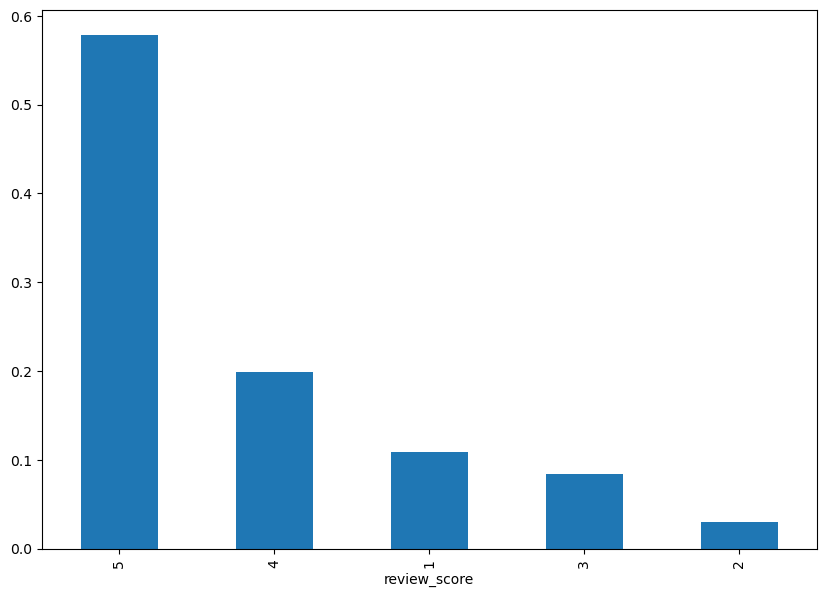

In [37]:
#Lay ra cac KH ko review, tim phan bo diem review
noReviewCust = e_commerce['olist_order_reviews_dataset'][e_commerce['olist_order_reviews_dataset']['review_comment_title'].isnull()]
dataPlot = noReviewCust['review_score'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(10, 7))
dataPlot.plot.bar(ax=ax)

Tạm thời bỏ các kết quả review_score được trên 4, ta thấy trong số các lần review tồi thì *số phiếu bỏ đánh giá là "1" khá cao (khoảng ~1.3%)* trong khi nó nên dưới 1%  
=> Ta tập trung tìm hiểu lý do tại sao lại có nhiều khách hàng không hài lòng về dịch vụ và sản phẩm đến thế

In [38]:
underScore = noReviewCust[noReviewCust['review_score'] == 1]
underScore.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,NaN,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03
41,eb26c2bfb5030f57dcef30d3f111eb1e,88096595631e8d26b658306256e3ce34,1,NaN,NaN,2018-02-08 00:00:00,2018-02-10 04:28:43
51,e233e51d11511bf30e568c76360ace52,548df2c6e5f089574614894bca78acf5,1,NaN,recebi somente 1 controle Midea Split ESTILO.\...,2018-01-28 00:00:00,2018-02-04 11:06:15
68,6d06808638ec0701bccd70bc8d462c28,97d2f8fe76f2f253b8291e17b5383884,1,NaN,O produto não chegou no prazo estipulado e cau...,2016-12-09 00:00:00,2016-12-19 14:10:43
76,60c714ed14cef913944a3147094a4742,9ac05114800f02bfaa783bd76842dbe2,1,NaN,"Produto muito inferior, mal acabado.",2018-07-03 00:00:00,2018-07-05 19:03:52
89,65dfeb60c40e3cbb0a1838285d86f885,a2714ecbf6eeb3bb9cd7dba6dc1c5e82,1,NaN,Pedi reembolso e sem resposta até momento,2018-03-08 00:00:00,2018-03-08 12:27:34
91,1090909faae22e5ab76903e8493063f1,a1341cb83bbf1b47392f4a3685d56bad,1,NaN,NaN,2018-03-07 00:00:00,2018-03-07 15:32:23


Do bước tiếp theo cần phân tích các feedback từ KH cũng như rút ra các chủ đề bình luận chính  
=> Tách nội dung phân tích này ra thành 1 bài EDA khác với chủ đề là phân tích vấn đề từ bình luận của KH

In [39]:
# Output file: phien ban 1 output ra 1 file Excel
'''''
outFileName = os.getcwd() + '\BrazilianECommerce.xlsx'

with pd.ExcelWriter(outFileName) as writeObj:
    for key, value in e_commerce.items():
        value.to_excel(writeObj, sheet_name=key)
'''''

"''\noutFileName = os.getcwd() + '\\BrazilianECommerce.xlsx'\n\nwith pd.ExcelWriter(outFileName) as writeObj:\n    for key, value in e_commerce.items():\n        value.to_excel(writeObj, sheet_name=key)\n"

In [40]:
#Output file ver 2: ra tung file csv rieng
fix_path = os.getcwd()

for key, value in e_commerce.items():
    fileName = fix_path + f'\\{key}.csv' 
    value.to_csv(fileName, index = False)
    